In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 


# from PostProcessingScripts import * 

# to make the screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import tables

# print("PyTables version:", tables.__version__)
# print("HDF5 version:", tables.get_hdf5_version())

### See note on the end for how to download the GW data 

### some code to build up the GROWL catalog 

In [132]:
import os
import glob
from collections import defaultdict

def build_growl_catalog(base_path='/Volumes/GROWL/GROWL_bps'):
    """
    Build a dictionary structure for GROWL catalog with authors and their datasets.
    
    Structure:
    {
        'author_name': {
            'datasets': ['dataset1', 'dataset2', ...],
            'file_name': 'COMPAS_Output_Weighted.h5',
            'paths': {
                'dataset1': '/Volumes/GROWL/Boesky24/alpha0_1beta0_25/',
                'dataset2': '/Volumes/GROWL/Boesky24/alpha0_1beta0_5/'
            }
            'labels':{'dataset1': r'$\alpha 0.1 \ \beta=0.25$',
                      'dataset2': r'$\alpha 0.1 \ \beta=0.5$'
            
            }
        }
    }
    """
    catalog = {}
    
    if not os.path.exists(base_path):
        print(f"Base path {base_path} does not exist")
        return catalog
    
    # Get all author directories
    author_dirs = [d for d in os.listdir(base_path) 
                  if os.path.isdir(os.path.join(base_path, d)) and not d.startswith('.')]
    
    for author in author_dirs:
        author_path = os.path.join(base_path, author)
        
        # Get all dataset directories for this author
        dataset_dirs = [d for d in os.listdir(author_path) 
                       if os.path.isdir(os.path.join(author_path, d)) and not d.startswith('.')]
        
        if not dataset_dirs:
            continue
            
        # Find the common HDF5 file name by checking the first dataset
        first_dataset_path = os.path.join(author_path, dataset_dirs[0])
        h5_files = glob.glob(os.path.join(first_dataset_path, '*.h5'))
        
        if not h5_files:
            print(f"Warning: No HDF5 files found in {first_dataset_path}")
            continue
            
        # Assume the first HDF5 file is the standard one
        file_name = os.path.basename(h5_files[0])
        
        # Build paths dictionary
        paths = {}
        for dataset in dataset_dirs:
            dataset_path = os.path.join(author_path, dataset)
            # Verify the HDF5 file exists in this dataset
            expected_file = os.path.join(dataset_path, file_name)
            if os.path.exists(expected_file):
                paths[dataset] = dataset_path + '/'
            else:
                print(f"Warning: {expected_file} not found")
        
        catalog[author] = {
            'datasets': sorted(dataset_dirs),
            'file_name': file_name,
            'paths': paths
        }
    
    return catalog

def get_file_path(catalog, author, dataset):
    """
    Get the full path to an HDF5 file for a specific author and dataset.
    """
    if author not in catalog:
        raise ValueError(f"Author '{author}' not found in catalog")
    
    if dataset not in catalog[author]['paths']:
        raise ValueError(f"Dataset '{dataset}' not found for author '{author}'")
    
    path = catalog[author]['paths'][dataset]
    file_name = catalog[author]['file_name']
    return os.path.join(path, file_name)

def list_authors(catalog):
    """Get list of all authors."""
    return list(catalog.keys())

def list_datasets(catalog, author):
    """Get list of all datasets for a specific author."""
    if author not in catalog:
        raise ValueError(f"Author '{author}' not found in catalog")
    return catalog[author]['datasets']

def print_catalog_summary(catalog):
    """Print a summary of the catalog structure."""
    print("GROWL Catalog Summary:")
    print("=" * 50)
    
    for author in sorted(catalog.keys()):
        print(f"\nAuthor: {author}")
        print(f"  File: {catalog[author]['file_name']}")
        print(f"  Datasets ({len(catalog[author]['datasets'])}):")
        for dataset in catalog[author]['datasets']:
            print(f"    - {dataset}")

# Example usage:
# if __name__ == "__main__":
#     # Build the catalog
#     growl_catalog = build_growl_catalog()
    
#     # Print summary
#     print_catalog_summary(growl_catalog)
    
#     # Example iterations:
#     print("\n" + "="*50)
#     print("Example iterations:")
    
#     # Iterate over authors
#     print("\nAuthors:")
#     for author in list_authors(growl_catalog):
#         print(f"  - {author}")
    
#     # Iterate over datasets for a specific author (e.g., Boesky24)
#     if 'Boesky24' in growl_catalog:
#         print(f"\nDatasets for Boesky24:")
#         for dataset in list_datasets(growl_catalog, 'Boesky24'):
#             print(f"  - {dataset}")
#             # Get full file path
#             file_path = get_file_path(growl_catalog, 'Boesky24', dataset)
#             print(f"    Path: {file_path}")
    
#     # Example of accessing a specific file
#     print("\nExample file access:")
#     try:
#         example_path = get_file_path(growl_catalog, 'Boesky24', 'alpha0_1beta0_25')
#         print(f"Boesky24 alpha0_1beta0_25 file: {example_path}")
#     except (ValueError, KeyError) as e:
#         print(f"Could not access example file: {e}")



# Build the catalog
growl_catalog = build_growl_catalog()

# Print summary
print_catalog_summary(growl_catalog)




if 'Boesky24' in growl_catalog:
    print(f"\nDatasets for Boesky24:")
    for dataset in list_datasets(growl_catalog, 'Boesky24'):
        print(f"  - {dataset}")
        # Get full file path
        file_path = get_file_path(growl_catalog, 'Boesky24', dataset)
        print(f"    Path: {file_path}")



GROWL Catalog Summary:

Author: Boesky24
  File: COMPAS_Output_Weighted.h5
  Datasets (10):
    - alpha0_1beta0_25
    - alpha0_1beta0_5
    - alpha0_1beta0_75
    - alpha0_5beta0_25
    - alpha0_5beta0_5
    - alpha0_5beta0_75
    - alpha10_beta0_5
    - alpha10_beta0_75
    - alpha2_beta0_5
    - alpha2beta0_25

Datasets for Boesky24:
  - alpha0_1beta0_25
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_25/COMPAS_Output_Weighted.h5
  - alpha0_1beta0_5
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_5/COMPAS_Output_Weighted.h5
  - alpha0_1beta0_75
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_1beta0_75/COMPAS_Output_Weighted.h5
  - alpha0_5beta0_25
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_5beta0_25/COMPAS_Output_Weighted.h5
  - alpha0_5beta0_5
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_5beta0_5/COMPAS_Output_Weighted.h5
  - alpha0_5beta0_75
    Path: /Volumes/GROWL/GROWL_bps/Boesky24/alpha0_5beta0_75/COMPAS_Output_Weighted.h5
  - alpha10_beta0

ValueError: Dataset 'alpha10_beta0_75' not found for author 'Boesky24'

In [2]:
# For you the part '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/' is probably different




path = '/Volumes/GROWL/Boesky24/alpha0_1beta0_25/'
file_name = 'COMPAS_Output_Weighted.h5'

full_path = path + file_name
fdata = h5.File(full_path, 'r')

print(fdata['BSE_Double'].keys())


<KeysViewHDF5 ['Add_Options_To_SysParms', 'Allow_Immediate_RLOF>CE_To_Survive_CE', 'Allow_MS_To_Survive_CE', 'Allow_Non_Stripped_ECSN', 'Allow_RLOF@Birth', 'Allow_Radiative_Envelope_To_Survive_CE', 'Allow_Touching@Birth', 'BB_Mass_xFer_Stblty_Prscrptn', 'BH_Kicks', 'CE_Alpha', 'CE_Alpha_Thermal', 'CE_Lambda', 'CE_Lambda_Multiplier', 'CE_Lambda_Prscrptn', 'CE_Mass_Accr_Constant', 'CE_Mass_Accr_Max', 'CE_Mass_Accr_Min', 'CE_Mass_Accr_Prscrptn', 'CE_Recomb_Enrgy_Dnsty', 'CE_Slope_Kruckow', 'CHE_Mode', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Check_Photon_Tiring_Limit', 'Circularise@MT', 'Conserve_AngMom@Circ', 'Cool_WindMassLoss_Multipl', 'Eccentricity', 'Eccentricity@ZAMS', 'Eccentricity_Dstrbtn', 'Eccentricity_Dstrbtn_Max', 'Eccentricity_Dstrbtn_Min', 'Eddington_Accr_Factor', 'Envelope_State_Prscrptn', 'Equilibrated_At_Birth', 'Error', 'Evolution_Mode', 'Fryer22_crit_COcore_Mass', 'Fryer22_mixing_fraction', 'Fryer_SN_Engine', 'Initial_Mass', 'Initial_Mass(1)', 'Initial_Mass(2)', 'Initial_Mass_Fun

In [3]:
print(fdata['Run_Details']['metallicity-min'][()][0])
metallicity_min = fdata['Run_Details']['metallicity-min'][()][0]


for param in ['semi-major-axis-max', 'semi-major-axis-min', 'minimum-secondary-mass', 'mass-ratio-min', 'mass-ratio-max',  'initial-mass-max', 'initial-mass-min']:
    param_val = fdata['Run_Details'][param][()][0]
    print(param, ' = ', param_val)
    


0.0001
semi-major-axis-max  =  1000.0
semi-major-axis-min  =  0.01
minimum-secondary-mass  =  0.1
mass-ratio-min  =  0.01
mass-ratio-max  =  1.0
initial-mass-max  =  150.0
initial-mass-min  =  5.0


### Calculate the formation efficiency 

In [4]:
# This function below is copied from GROWL-catalog-public/CosmicIntegration/cosmic_integration/totalMassEvolvedPerZ.py

def analytical_star_forming_mass_per_binary_using_kroupa_imf(
        m1_min, m1_max, m2_min, fbin=1., imf_mass_bounds=[0.01,0.08,0.5,200]
):
    """
    Analytical computation of the mass of stars formed per binary star formed within the
    [m1 min, m1 max] and [m2 min, ..] rage,
    using the Kroupa IMF:

        p(M) \propto M^-0.3 for M between m1 and m2
        p(M) \propto M^-1.3 for M between m2 and m3;
        p(M) = alpha * M^-2.3 for M between m3 and m4;

    @Ilya Mandel's derivation
    """
    m1, m2, m3, m4 = imf_mass_bounds
    if m1_min < m3:
        raise ValueError(f"This analytical derivation requires IMF break m3  < m1_min ({m3} !< {m1_min})")
    alpha = (-(m4**(-1.3)-m3**(-1.3))/1.3 - (m3**(-0.3)-m2**(-0.3))/(m3*0.3) + (m2**0.7-m1**0.7)/(m2*m3*0.7))**(-1)
    # average mass of stars (average mass of all binaries is a factor of 1.5 larger)
    m_avg = alpha * (-(m4**(-0.3)-m3**(-0.3))/0.3 + (m3**0.7-m2**0.7)/(m3*0.7) + (m2**1.7-m1**1.7)/(m2*m3*1.7))
    # fraction of binaries that COMPAS simulates
    fint = -alpha / 1.3 * (m1_max ** (-1.3) - m1_min ** (-1.3)) + alpha * m2_min / 2.3 * (m1_max ** (-2.3) - m1_min ** (-2.3))
    # mass represented by each binary simulated by COMPAS
    m_rep = (1/fint) * m_avg * (1.5 + (1-fbin)/fbin)
    return m_rep



In [5]:
# COMPAS saves the distribution assumptions, fbin comes from https://arxiv.org/pdf/2405.01630 
# we dont have to correct for separation as this is already 
initial_mass_min = fdata['Run_Details']['initial-mass-min'][()][0]
initial_mass_max = fdata['Run_Details']['initial-mass-max'][()][0] 
minimum_secondary_mass = fdata['Run_Details']['minimum-secondary-mass'][()][0] 
f_binary = 1


m_rep_per_binary = analytical_star_forming_mass_per_binary_using_kroupa_imf(m1_min=initial_mass_min, m1_max=initial_mass_max,\
                                                                            m2_min=minimum_secondary_mass, fbin=f_binary)


print('1 binary in COMPAS represents', m_rep_per_binary, ' solar masses formed')

# now calculate the number of binaries in COMPAS simulation (over the entire simulation)
n_binaries = np.shape(fdata['BSE_System_Parameters']['SEED'][()])[0]
print(n_binaries)


total_mass_evolved_compas = n_binaries * m_rep_per_binary
print(total_mass_evolved_compas, ' [Msun]')



1 binary in COMPAS represents 79.11015055714887  solar masses formed
20000000
1582203011.1429775  [Msun]


In [6]:
print(fdata['BSE_Double_Compact_Objects'].keys())
print('\n \n')
print(fdata['BSE_System_Parameters'].keys())
print('\n \n')


print(fdata.keys())
print('\n \n')
print(fdata['BSE_Common_Envelopes'].keys())

<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'Mass(1)', 'Mass(2)', 'Merges_Hubble_Time', 'Recycled_NS(1)', 'Recycled_NS(2)', 'SEED', 'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time', 'mixture_weight']>

 

<KeysViewHDF5 ['Add_Options_To_SysParms', 'Allow_Immediate_RLOF>CE_To_Survive_CE', 'Allow_MS_To_Survive_CE', 'Allow_Non_Stripped_ECSN', 'Allow_RLOF@Birth', 'Allow_Radiative_Envelope_To_Survive_CE', 'Allow_Touching@Birth', 'BB_Mass_xFer_Stblty_Prscrptn', 'BH_Kicks', 'CE_Alpha', 'CE_Alpha_Thermal', 'CE_Lambda', 'CE_Lambda_Multiplier', 'CE_Lambda_Prscrptn', 'CE_Mass_Accr_Constant', 'CE_Mass_Accr_Max', 'CE_Mass_Accr_Min', 'CE_Mass_Accr_Prscrptn', 'CE_Recomb_Enrgy_Dnsty', 'CE_Slope_Kruckow', 'CHE_Mode', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Check_Photon_Tiring_Limit', 'Circularise@MT', 'Conserve_AngMom@Circ', 'Cool_WindMassLoss_Multipl', 'Eccentricity', 'Eccentricity@ZAMS', 'Eccentricity_Dstrbtn', 'Eccentricity_Dstrbtn_Max', 'Eccentricity_Dstrbtn_Min', 'Eddington_Accr_

In [7]:
# fdata = 

for header in ['Allow_Immediate_RLOF>CE_To_Survive_CE', 'Allow_MS_To_Survive_CE', 'Allow_RLOF@Birth', 'Allow_Touching@Birth']:
    values = fdata['BSE_System_Parameters'][header][()]
    print(header, ' = ', values[0:10])


Allow_Immediate_RLOF>CE_To_Survive_CE  =  [0 0 0 0 0 0 0 0 0 0]
Allow_MS_To_Survive_CE  =  [1 1 1 1 1 1 1 1 1 1]
Allow_RLOF@Birth  =  [1 1 1 1 1 1 1 1 1 1]
Allow_Touching@Birth  =  [0 0 0 0 0 0 0 0 0 0]


In [100]:
# Add ../../common_code to sys.path
sys.path.append(os.path.abspath("../../common_code"))

from PostProcessingScripts import *
# from ../../common_code/PostProcessingScripts import *

In [8]:
Stellar_Type1 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(1)'][()]
Stellar_Type2 = fdata['BSE_Double_Compact_Objects']['Stellar_Type(2)'][()]
Merges_Hubble_Time = fdata['BSE_Double_Compact_Objects']['Merges_Hubble_Time'][()]
Optimistic_CE = fdata['BSE_Common_Envelopes']['Optimistic_CE'][()]

Pessimistic_CE_DCO_mask = np.in1d(fdata['BSE_Double_Compact_Objects']['SEED'][()], fdata['BSE_Common_Envelopes']['SEED'][()][Optimistic_CE==0])


BBH_mask = (Stellar_Type1==14) & (Stellar_Type2==14) & (Merges_Hubble_Time==True) & (Pessimistic_CE_DCO_mask==True)
print('total DCOs in file = ', len(BBH_mask), 'total DCOs we mask = ', np.sum(BBH_mask)) # to check how many we are cutting :) 


mask_sys_BBHs = np.in1d(fdata['BSE_System_Parameters']['SEED'][()], fdata['BSE_Double_Compact_Objects']['SEED'][()][BBH_mask])
metallicity_BBHs = (fdata['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()][mask_sys_BBHs])
print('with metallicities = ', metallicity_BBHs)

mixture_weight = fdata['BSE_Double_Compact_Objects']['mixture_weight'][()][BBH_mask]

formation_efficiencies = mixture_weight/total_mass_evolved_compas

delay_times = (fdata['BSE_Double_Compact_Objects']['Coalescence_Time'][()] + fdata['BSE_Double_Compact_Objects']['Time'][()])[BBH_mask]


total DCOs in file =  4881951 total DCOs we mask =  1649874
with metallicities =  [0.00062708 0.00113757 0.00213616 ... 0.00045117 0.00047619 0.00147745]


In [104]:
def get_primary_secondary(m1, m2):
    """
    Return (primary, secondary) where primary >= secondary element-wise.
    Works with scalars, lists, or numpy arrays.
    """
    m1_arr = np.asarray(m1)
    m2_arr = np.asarray(m2)

    primary = np.maximum(m1_arr, m2_arr)
    secondary = np.minimum(m1_arr, m2_arr)

    # if inputs were scalars, return scalars instead of arrays
    if np.isscalar(m1) and np.isscalar(m2):
        return primary.item(), secondary.item()
    return primary, secondary


import numpy as np
import astropy.units as u
from typing import Union

def get_primary_secondary(
    m1: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun,
    m2: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun
):
    """
    Return (primary, secondary) where primary >= secondary element-wise.
    
    Parameters
    ----------
    m1, m2 : float, list, np.ndarray, or astropy.units.Quantity
        Component masses. Units are preserved; results always in Msun.
    
    Returns
    -------
    primary, secondary : Quantity
        More massive (primary) and less massive (secondary), in Msun.
    """
    # Convert to Quantity with units
    if not isinstance(m1, u.Quantity):
        m1 = np.asarray(m1) * u.Msun
    if not isinstance(m2, u.Quantity):
        m2 = np.asarray(m2) * u.Msun

    # Convert both to Msun
    m1 = m1.to(u.Msun)
    m2 = m2.to(u.Msun)

    primary = np.maximum(m1, m2)
    secondary = np.minimum(m1, m2)

    return primary, secondary


def chirp_mass(
    m1: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun,
    m2: Union[float, np.ndarray, u.Quantity] = 0 * u.Msun
):
    """
    Compute the chirp mass given component masses m1 and m2.
    
    Parameters
    ----------
    m1, m2 : float, list, np.ndarray, or astropy.units.Quantity
        Component masses. Units are preserved; results always in Msun.
    
    Returns
    -------
    Mc : Quantity
        Chirp mass in Msun.
    """
    if not isinstance(m1, u.Quantity):
        m1 = np.asarray(m1, dtype=float) * u.Msun
    if not isinstance(m2, u.Quantity):
        m2 = np.asarray(m2, dtype=float) * u.Msun

    # Convert both to Msun
    m1 = m1.to(u.Msun)
    m2 = m2.to(u.Msun)

    mc = (m1 * m2) ** (3/5) / ((m1 + m2) ** (1/5))
    return mc.to(u.Msun)




In [105]:
path = '/Volumes/GROWL/Boesky24/alpha0_1beta0_25/'
file_name = 'COMPAS_Output_Weighted.h5'
full_path = path + file_name
fdata = h5.File(full_path, 'r')

M1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()][BBH_mask]
M2 = fdata['BSE_Double_Compact_Objects']['Mass(2)'][()][BBH_mask]
primary_mass, secondary_mass = get_primary_secondary(m1=M1, m2=M2)

print(primary_mass)
print(secondary_mass)

[17.78438235 18.45481379 16.18450929 ... 15.78244684 22.78288834
 13.88765635] solMass
[ 8.85953402  5.12625809  7.55557286 ...  9.0386351  10.37215044
  7.36046439] solMass


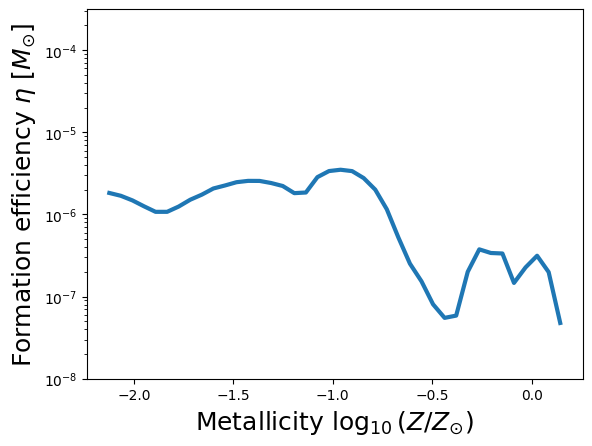

In [9]:
fs=18

hist, bin_edges = np.histogram(np.log10(metallicity_BBHs/0.0142), weights=formation_efficiencies, bins=40, density=True)

bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
normalization = np.sum(formation_efficiencies)

plt.plot(bin_centers, hist*normalization, lw=3)


plt.yscale('log')
plt.ylim(10**-8, 10**-3.5)

plt.ylabel(r'Formation efficiency $\eta \ [M_{\odot}]$', fontsize=fs)
plt.xlabel(r'Metallicity $\log_{10}(Z/Z_{\odot})$', fontsize=fs)
plt.show()

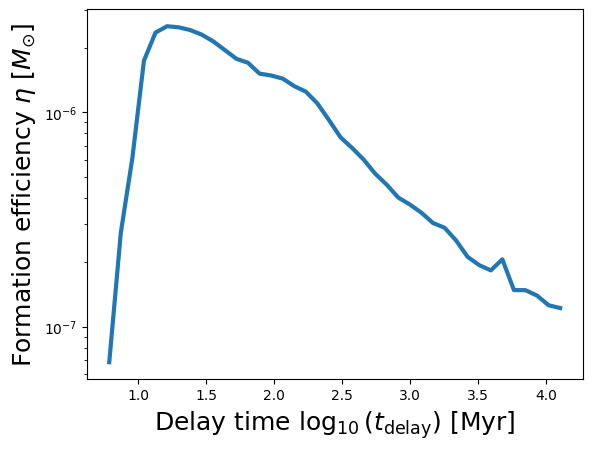

In [10]:
fs=18

hist, bin_edges = np.histogram(np.log10(delay_times), weights=formation_efficiencies, bins=40, density=True)

bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
normalization = np.sum(formation_efficiencies)

plt.plot(bin_centers, hist*normalization, lw=3)


plt.yscale('log')
# plt.ylim(10**-8, 10**-3.5)

plt.ylabel(r'Formation efficiency $\eta \ [M_{\odot}]$', fontsize=fs)
plt.xlabel(r'Delay time $\log_{10}(t_{\rm{delay}}) \ [\rm{Myr}]$', fontsize=fs)
plt.show()

In [11]:
import os, copy, h5py
import astropy.units as u
import numpy as np
import pandas as pd

import sys

# sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve')
sys.path.insert(0, '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve')


In [12]:
# import syntheticstellarpopconvolve 

In [13]:
from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
from syntheticstellarpopconvolve.general_functions import generate_boilerplate_outputfile, extract_unit_dict, temp_dir

In [44]:
res_lb=0.1
lb_bins_temp = np.arange(0,10+res_lb, step=res_lb)
lb_bins = np.round(lb_bins_temp, 2).tolist()
print(lb_bins)
print(lb_bins*u.Gyr)
print('\n \n \n')

import numpy as np
from astropy import units as u
from astropy.cosmology import Planck18, z_at_value

def redshift_from_lookbacktime(cosmology, lookback_times_gyr):
    """
    Convert one or more lookback times to redshift(s).
    """
    lookback_times = np.atleast_1d(lookback_times_gyr) * u.Gyr
    zs = [z_at_value(cosmology.lookback_time, t) for t in lookback_times]
    return np.array(zs)

# Example
# lbs_z = (np.asarray(lb_bins)+(res_lb/2))
# redshifts = redshift_from_lookbacktime(Planck18, lbs_z)

def lookbacktime_from_redshift(cosmology, redshifts):
    """
    Calculate lookback time(s) from redshift(s).

    Parameters
    ----------
    cosmology : astropy.cosmology.FLRW
        Cosmology instance (e.g., Planck18).
    redshifts : float or array-like
        Redshift(s).

    Returns
    -------
    lookback_times_gyr : float or np.ndarray
        Lookback time(s) in Gyr.
    """
    z = np.atleast_1d(redshifts)
    lb_times = cosmology.lookback_time(z)
    return lb_times.to(u.Gyr).value if np.ndim(redshifts) > 0 else lb_times.to(u.Gyr).value.item()


res_z = 0.2
redshifts = np.arange(0,10+res_z, step=res_z)
# redshifts = np.round(redshifts_temp, 2).tolist()
print(redshifts)
# print(lb_bins*u.Gyr)
print('\n \n \n')


# Examples
lb_bins = lookbacktime_from_redshift(Planck18, redshifts)        # scalar z
# print(lookbacktime_from_redshift(Planck18, [0.5, 1, 3]))  # array of z

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  

In [28]:
# print(lb_bins)

# print()
print(lb_bins)

[ 0.          2.51207159  4.416738    5.88270245  7.02778637  7.935542
  8.66561385  9.26088035  9.75245879 10.16319076 10.51005492 10.80583627
 11.06028624 11.2809352  11.47366726 11.64313146 11.79303943 11.92638323
 12.04559675 12.15267657 12.2492734  12.33676197 12.416295   12.48884523
 12.55523837 12.61617926 12.67227271 12.72404023 12.77193359 12.81634584
 12.85762035 12.89605826 12.93192463 12.96545356 12.99685251 13.0263059
 13.05397815 13.08001627 13.10455205 13.12770393 13.14957865 13.17027259
 13.189873   13.208459   13.22610252 13.24286908 13.25881846 13.27400528
 13.28847959 13.30228728 13.31547052]


In [30]:
# TMP_DIR = temp_dir(
#     "examples", "minimal_working_example", clean_path=True
# )

# res_lb=0.1
# lb_bins_temp = np.arange(0,10+res_lb, step=res_lb)
# lb_bins = np.round(lb_bins_temp, 2).tolist()
# print(lb_bins)

TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")
generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "probability": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")

# Set up global configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config["output_filename"] = output_hdf5_filename

# Set up SFR
convolution_config["SFR_info"] = {
    "lookback_time_bin_edges": np.asarray(lb_bins) * u.Gyr,
    "starformation_rate_array": np.asarray(lb_bins)[1:] * u.Msun / u.Gyr
}

# set up convolution bin edges
convolution_config["convolution_lookback_time_bin_edges"] = (
    np.asarray(lb_bins) * u.Gyr
)

# print(lb_bins* u.Gyr)

# Set up the convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "input_data_name": "example",
        "output_data_name": "example",
        "data_column_dict": {
            "delay_time": "delay_time",
            "normalized_yield": {"column_name": "probability", "unit": 1/u.Msun},
        },
    }
]

# run convolution
convolve(convolution_config)

# # read out results
# with h5py.File(
#     convolution_config["output_filename"], "r"
# ) as output_hdf5file:
#     groupname = "output_data/example/example/convolution_results/0.5 Gyr/"

#     yield_data = output_hdf5file[groupname + "/yield"][()]
#     unit_dict = extract_unit_dict(output_hdf5file, groupname)

#     print(yield_data) # values
#     print(unit_dict) # units

In [31]:
fdata.close()

In [33]:
print(np.asarray(lb_bins) * u.Gyr)

[ 0.          2.51207159  4.416738    5.88270245  7.02778637  7.935542
  8.66561385  9.26088035  9.75245879 10.16319076 10.51005492 10.80583627
 11.06028624 11.2809352  11.47366726 11.64313146 11.79303943 11.92638323
 12.04559675 12.15267657 12.2492734  12.33676197 12.416295   12.48884523
 12.55523837 12.61617926 12.67227271 12.72404023 12.77193359 12.81634584
 12.85762035 12.89605826 12.93192463 12.96545356 12.99685251 13.0263059
 13.05397815 13.08001627 13.10455205 13.12770393 13.14957865 13.17027259
 13.189873   13.208459   13.22610252 13.24286908 13.25881846 13.27400528
 13.28847959 13.30228728 13.31547052] Gyr


In [32]:
# full_path_sspc = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try/output_example.h5'
# fdata = h5.File(full_path_sspc, 'r')
# print(fdata.keys())
# print('\n \n')
# print(fdata['output_data']['example']['example']['convolution_results'].keys())




<KeysViewHDF5 ['config', 'input_data', 'output_data']>

 

<KeysViewHDF5 ['1.256 Gyr', '10.3366 Gyr', '10.6579 Gyr', '10.9331 Gyr', '11.1706 Gyr', '11.3773 Gyr', '11.5584 Gyr', '11.7181 Gyr', '11.8597 Gyr', '11.986 Gyr', '12.0991 Gyr', '12.201 Gyr', '12.293 Gyr', '12.3765 Gyr', '12.4526 Gyr', '12.522 Gyr', '12.5857 Gyr', '12.6442 Gyr', '12.6982 Gyr', '12.748 Gyr', '12.7941 Gyr', '12.837 Gyr', '12.8768 Gyr', '12.914 Gyr', '12.9487 Gyr', '12.9812 Gyr', '13.0116 Gyr', '13.0401 Gyr', '13.067 Gyr', '13.0923 Gyr', '13.1161 Gyr', '13.1386 Gyr', '13.1599 Gyr', '13.1801 Gyr', '13.1992 Gyr', '13.2173 Gyr', '13.2345 Gyr', '13.2508 Gyr', '13.2664 Gyr', '13.2812 Gyr', '13.2954 Gyr', '13.3089 Gyr', '3.4644 Gyr', '5.1497 Gyr', '6.4552 Gyr', '7.4817 Gyr', '8.3006 Gyr', '8.9632 Gyr', '9.5067 Gyr', '9.9578 Gyr']>


In [19]:
# print(redshifts)
# print(lb_bins)
# diff = np.diff(lb_bins)

# print(lb_bins+(diff[0]/2))

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]
[ 0.          2.51207159  4.416738    5.88270245  7.02778637  7.935542
  8.66561385  9.26088035  9.75245879 10.16319076 10.51005492 10.80583627
 11.06028624 11.2809352  11.47366726 11.64313146 11.79303943 11.92638323
 12.04559675 12.15267657 12.2492734  12.33676197 12.416295   12.48884523
 12.55523837 12.61617926 12.67227271 12.72404023 12.77193359 12.81634584
 12.85762035 12.89605826 12.93192463 12.96545356 12.99685251 13.0263059
 13.05397815 13.08001627 13.10455205 13.12770393 13.14957865 13.17027259
 13.189873   13.208459   13.22610252 13.24286908 13.25881846 13.27400528
 13.28847959 13.30228728 13.31547052]
[ 1.2560358   3.76810739  5.67277379  7.13873825  8.28382216  9.1915778
  9.92164965 10.51691614 11.00849458 11.41922656 

In [26]:

# center_lb_bins = np.round(lb_bins+(diff[0]/2),4)
# print(center_lb_bins)

# '1.256 Gyr'

[ 1.256   3.7681  5.6728  7.1387  8.2838  9.1916  9.9216 10.5169 11.0085
 11.4192 11.7661 12.0619 12.3163 12.537  12.7297 12.8992 13.0491 13.1824
 13.3016 13.4087 13.5053 13.5928 13.6723 13.7449 13.8113 13.8722 13.9283
 13.9801 14.028  14.0724 14.1137 14.1521 14.188  14.2215 14.2529 14.2823
 14.31   14.3361 14.3606 14.3837 14.4056 14.4263 14.4459 14.4645 14.4821
 14.4989 14.5149 14.53   14.5445 14.5583 14.5715]


In [22]:
# from astropy.cosmology import WMAP7   # WMAP 7-year cosmology, change to correct one
# from astropy.cosmology import z_at_value
# cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)


# redshifts = z_at_value(cosmo.age, lb_bins)

# print(redshifts)

In [51]:
# lb_values = np.asarray(lb_bins)
# print(lb_values)

# diff = np.diff(lb_bins) # = lookbacktime_from_redshift(Planck18, redshifts)  
# print(diff)
# print('\n')


# center_lb_bins = lb_values[:-1] + (diff/2)
# center_lb_bins_round = np.round(center_lb_bins, 4)
# print('\n')
# print(center_lb_bins_round)
# # center_lb_bins = np.round(np.asarray(lb_bins)[-1]+(diff/2),4)
# # print(center_lb_bins)
# # print(np.sort(center_lb_bins))


# keys_ = ['1.256 Gyr', '10.3366 Gyr', '10.6579 Gyr', '10.9331 Gyr', '11.1706 Gyr', '11.3773 Gyr', '11.5584 Gyr', '11.7181 Gyr', '11.8597 Gyr', '11.986 Gyr', '12.0991 Gyr', '12.201 Gyr', '12.293 Gyr', '12.3765 Gyr', '12.4526 Gyr', '12.522 Gyr', '12.5857 Gyr', '12.6442 Gyr', '12.6982 Gyr', '12.748 Gyr', '12.7941 Gyr', '12.837 Gyr', '12.8768 Gyr', '12.914 Gyr', '12.9487 Gyr', '12.9812 Gyr', '13.0116 Gyr', '13.0401 Gyr', '13.067 Gyr', '13.0923 Gyr', '13.1161 Gyr', '13.1386 Gyr', '13.1599 Gyr', '13.1801 Gyr', '13.1992 Gyr', '13.2173 Gyr', '13.2345 Gyr', '13.2508 Gyr', '13.2664 Gyr', '13.2812 Gyr', '13.2954 Gyr', '13.3089 Gyr', '3.4644 Gyr', '5.1497 Gyr', '6.4552 Gyr', '7.4817 Gyr', '8.3006 Gyr', '8.9632 Gyr', '9.5067 Gyr', '9.9578 Gyr']
# print('\n')
# print(np.sort(keys_))

[ 0.          2.51207159  4.416738    5.88270245  7.02778637  7.935542
  8.66561385  9.26088035  9.75245879 10.16319076 10.51005492 10.80583627
 11.06028624 11.2809352  11.47366726 11.64313146 11.79303943 11.92638323
 12.04559675 12.15267657 12.2492734  12.33676197 12.416295   12.48884523
 12.55523837 12.61617926 12.67227271 12.72404023 12.77193359 12.81634584
 12.85762035 12.89605826 12.93192463 12.96545356 12.99685251 13.0263059
 13.05397815 13.08001627 13.10455205 13.12770393 13.14957865 13.17027259
 13.189873   13.208459   13.22610252 13.24286908 13.25881846 13.27400528
 13.28847959 13.30228728 13.31547052]
[2.51207159 1.9046664  1.46596446 1.14508391 0.90775564 0.73007185
 0.59526649 0.49157844 0.41073198 0.34686415 0.29578135 0.25444998
 0.22064896 0.19273206 0.16946421 0.14990797 0.13334379 0.11921352
 0.10707982 0.09659683 0.08748857 0.07953304 0.07255023 0.06639314
 0.06094089 0.05609345 0.05176752 0.04789336 0.04441225 0.04127451
 0.03843791 0.03586636 0.03352893 0.03139895 0

In [55]:
# lb_values = np.asarray(lb_bins)
# diff = np.diff(lb_bins) # = lookbacktime_from_redshift(Planck18, redshifts)  

# center_lb_bins = lb_values[:-1] + (diff/2) # take the centers of the bins 
# center_lb_bins_round = np.round(center_lb_bins, 4) # round to mathc printing




# total_rate = np.zeros_like(redshifts)
# for ind_lb, lb_time in enumerate(center_lb_bins_round):
    
#     print(ind_lb, lb_time)
# #     print(fdata['output_data']['example']['example']['convolution_results']['%s Gyr'%lb_time]['yield'].keys())
#     rate = fdata['output_data']['example']['example']['convolution_results']['%s Gyr'%lb_time]['yield'][()]
#     total_rate[ind_lb] = np.sum(rate)
    
# print(redshifts)
# print(total_rate)

0 1.256
1 3.4644
2 5.1497
3 6.4552
4 7.4817
5 8.3006
6 8.9632
7 9.5067
8 9.9578
9 10.3366
10 10.6579
11 10.9331
12 11.1706
13 11.3773
14 11.5584
15 11.7181
16 11.8597
17 11.986
18 12.0991
19 12.201
20 12.293
21 12.3765
22 12.4526
23 12.522
24 12.5857
25 12.6442
26 12.6982
27 12.748
28 12.7941
29 12.837
30 12.8768
31 12.914
32 12.9487
33 12.9812
34 13.0116
35 13.0401
36 13.067
37 13.0923
38 13.1161
39 13.1386
40 13.1599
41 13.1801
42 13.1992
43 13.2173
44 13.2345
45 13.2508
46 13.2664
47 13.2812
48 13.2954
49 13.3089
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]
[8.09855641e-06 1.42389261e-05 1.89649840e-05 2.26565694e-05
 2.55830426e-05 2.79366889e-05 2.98557422e-05 3.14405202e-05
 3.27646608e-05 3.38829008e-05 3.48364572e-05 3.56567672e-05
 3.63681076e-05 3.69894480e-05 3.75

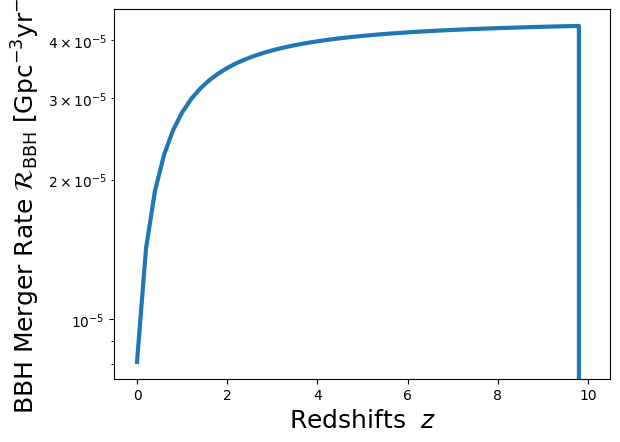

In [54]:
# fs=18


# plt.plot(redshifts, total_rate, lw=3)


# plt.yscale('log')
# # plt.ylim(10**-8, 10**-3.5)

# plt.ylabel(r'BBH Merger Rate $\mathcal{R}_{\rm{BBH}} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$', fontsize=fs)
# plt.xlabel(r'Redshifts  $z$', fontsize=fs)
# plt.show()



In [25]:
print(fdata['output_data']['example']['example']['convolution_results'].keys())
# print(np.shape(yield_))
# print(np.sum(yield_))


<KeysViewHDF5 ['1.256 Gyr', '10.3366 Gyr', '10.6579 Gyr', '10.9331 Gyr', '11.1706 Gyr', '11.3773 Gyr', '11.5584 Gyr', '11.7181 Gyr', '11.8597 Gyr', '11.986 Gyr', '12.0991 Gyr', '12.201 Gyr', '12.293 Gyr', '12.3765 Gyr', '12.4526 Gyr', '12.522 Gyr', '12.5857 Gyr', '12.6442 Gyr', '12.6982 Gyr', '12.748 Gyr', '12.7941 Gyr', '12.837 Gyr', '12.8768 Gyr', '12.914 Gyr', '12.9487 Gyr', '12.9812 Gyr', '13.0116 Gyr', '13.0401 Gyr', '13.067 Gyr', '13.0923 Gyr', '13.1161 Gyr', '13.1386 Gyr', '13.1599 Gyr', '13.1801 Gyr', '13.1992 Gyr', '13.2173 Gyr', '13.2345 Gyr', '13.2508 Gyr', '13.2664 Gyr', '13.2812 Gyr', '13.2954 Gyr', '13.3089 Gyr', '3.4644 Gyr', '5.1497 Gyr', '6.4552 Gyr', '7.4817 Gyr', '8.3006 Gyr', '8.9632 Gyr', '9.5067 Gyr', '9.9578 Gyr']>


In [ ]:
3.768

In [37]:
print(lb_bins)

print(np.diff(lb_bins))
diff = 4.416738-2.51207159  
print(2.51207159  +diff/2)

[ 0.          2.51207159  4.416738    5.88270245  7.02778637  7.935542
  8.66561385  9.26088035  9.75245879 10.16319076 10.51005492 10.80583627
 11.06028624 11.2809352  11.47366726 11.64313146 11.79303943 11.92638323
 12.04559675 12.15267657 12.2492734  12.33676197 12.416295   12.48884523
 12.55523837 12.61617926 12.67227271 12.72404023 12.77193359 12.81634584
 12.85762035 12.89605826 12.93192463 12.96545356 12.99685251 13.0263059
 13.05397815 13.08001627 13.10455205 13.12770393 13.14957865 13.17027259
 13.189873   13.208459   13.22610252 13.24286908 13.25881846 13.27400528
 13.28847959 13.30228728 13.31547052]
[2.51207159 1.9046664  1.46596446 1.14508391 0.90775564 0.73007185
 0.59526649 0.49157844 0.41073198 0.34686415 0.29578135 0.25444998
 0.22064896 0.19273206 0.16946421 0.14990797 0.13334379 0.11921352
 0.10707982 0.09659683 0.08748857 0.07953304 0.07255023 0.06639314
 0.06094089 0.05609345 0.05176752 0.04789336 0.04441225 0.04127451
 0.03843791 0.03586636 0.03352893 0.03139895 0

In [ ]:
print(fdata.close())

In [ ]:
print(fdata['output_data']['example']['example']['convolution_results'].keys())

In [ ]:
res_lb=0.1
lb_bins = np.arange(0,10+res_lb, step=res_lb)
# print(lb_bins)




In [ ]:
fdata.close()

## Try again but now based on redshift & updated plots 
(I think SFR is missing), below is based on https://synthetic-stellar-pop-convolve.readthedocs.io/en/latest/examples/notebook_example_GW_merger_rate_density.html 

In [57]:
import os
import json
import pkg_resources
import copy
import logging
import h5py

import pandas as pd
import numpy as np
import astropy.units as u

from syntheticstellarpopconvolve import convolve, default_convolution_config, default_convolution_instruction
from syntheticstellarpopconvolve.general_functions import temp_dir, generate_boilerplate_outputfile

TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try' # #temp_dir("notebooks", "notebook_example_GW_merger_rate_density", clean_path=True)
VERBOSITY = 0

# The flag below allows the user to run this notebook without the full data or starformation rate.
FULL_VERSION = os.getenv("EXAMPLE_USECASE_GW_FULL_VERSION", False)

import matplotlib as plt

from syntheticstellarpopconvolve.starformation_rate_distributions import starformation_rate_distribution_vanSon2023
from syntheticstellarpopconvolve.metallicity_distributions import metallicity_distribution_vanSon2022
from syntheticstellarpopconvolve.general_functions import calculate_bincenters, calculate_bin_edges
from syntheticstellarpopconvolve.SFR_dict_plotting_routines import plot_sfr_dict

### Set up SFR(Z,z)

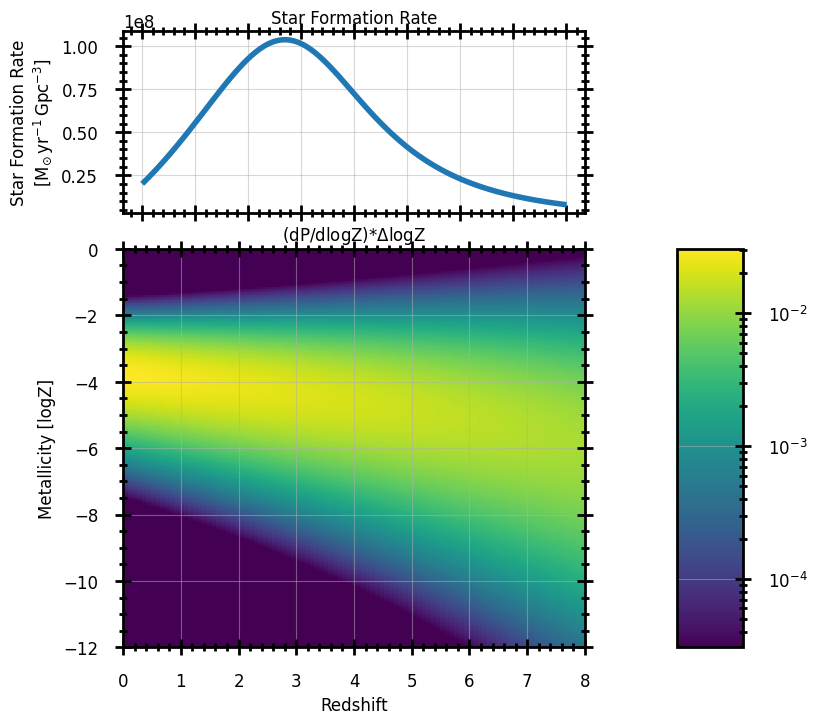

In [58]:


# Set up redshift bin info
num_redshift_bins = 100
redshift_bin_edges = np.linspace(0, 8, num_redshift_bins); redshift_bin_centers = calculate_bincenters(redshift_bin_edges)

# Set up metallicity bin info
num_metallicity_bins = 200
log_metallicity_bin_edges = np.linspace(-12, 0, num_metallicity_bins); log_metallicity_bin_centers = calculate_bincenters(log_metallicity_bin_edges)

#
sfr = starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)

#
dpdlogZ = metallicity_distribution_vanSon2022(
    log_metallicity_centers=log_metallicity_bin_centers,
    redshifts=redshift_bin_centers,
)

high_res_sfr_dict = {
    "redshift_bin_edges": redshift_bin_edges,
    "starformation_rate_array": sfr,
    "metallicity_bin_edges": log_metallicity_bin_edges,
    "metallicity_distribution_array": dpdlogZ,
}

axis_dict = plot_sfr_dict(
    high_res_sfr_dict,
    time_type="redshift",
    metallicity_string="logZ",
    metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
    metallicity_distribution_multiply_by_sfr=False,
    metallicity_distribution_scale="log10",
    metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
    return_axis_dict=True,
    figsize=(8,8),
    fontsize=12,
)

In [71]:
# metallicity data from earlier (from COMPAS simulations)

# hist, bin_edgeshist, bin_edges = np.histogram(np.log10(metallicity_BBHs/0.0142), weights=formation_efficiencies, bins=40, density=True)

# bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2

print(bin_edges)
print(bin_centers)

temp_bin_centers =  (10**bin_centers)*0.0142
print(temp_bin_centers)



_, bin_edgeshist_sspc = np.histogram(np.log(metallicity_BBHs), weights=formation_efficiencies, bins=40, density=True)
bin_centers_sspc = (bin_edgeshist_sspc[0:-1] + bin_edgeshist_sspc[1:])/2

print()
print(bin_edgeshist_sspc)
print(calculate_bin_edges(bin_centers_sspc))

[0.74407147 0.82914423 0.91421699 0.99928975 1.08436251 1.16943527
 1.25450803 1.33958079 1.42465355 1.50972631 1.59479907 1.67987183
 1.76494458 1.85001734 1.9350901  2.02016286 2.10523562 2.19030838
 2.27538114 2.3604539  2.44552666 2.53059942 2.61567218 2.70074494
 2.7858177  2.87089046 2.95596322 3.04103598 3.12610874 3.2111815
 3.29625426 3.38132702 3.46639978 3.55147254 3.6365453  3.72161806
 3.80669082 3.89176358 3.97683634 4.0619091  4.14698186]
[0.78660785 0.87168061 0.95675337 1.04182613 1.12689889 1.21197165
 1.29704441 1.38211717 1.46718993 1.55226269 1.63733545 1.7224082
 1.80748096 1.89255372 1.97762648 2.06269924 2.147772   2.23284476
 2.31791752 2.40299028 2.48806304 2.5731358  2.65820856 2.74328132
 2.82835408 2.91342684 2.9984996  3.08357236 3.16864512 3.25371788
 3.33879064 3.4238634  3.50893616 3.59400892 3.67908168 3.76415444
 3.8492272  3.93429996 4.01937272 4.10444548]
[8.68752746e-02 1.05674195e-01 1.28541011e-01 1.56355971e-01
 1.90189804e-01 2.31344932e-01 2.8

(1e-06, 1)

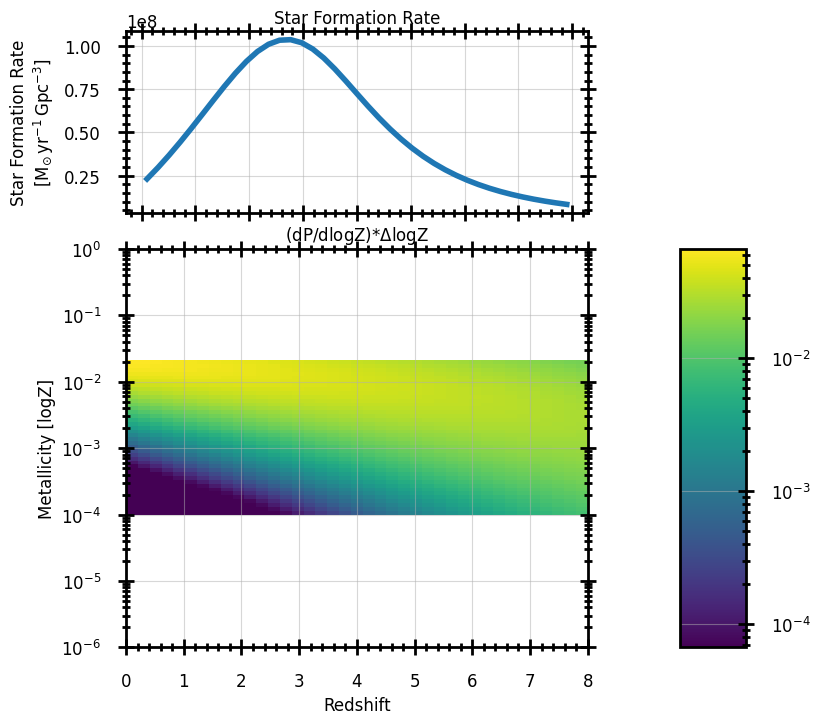

In [72]:
# example_usecase_GW_events_data['log_metallicity'] = np.log(example_usecase_GW_events_data['metallicity'])

# log_metallicity_bin_centers = np.sort(example_usecase_GW_events_data['log_metallicity'].unique())
# log_metallicity_bin_edges = calculate_bin_edges(log_metallicity_bin_centers)


log_metallicity_bin_centers = np.asarray(bin_centers_sspc)
log_metallicity_bin_edges = np.asarray(bin_edgeshist_sspc)

# convert
metallicity_bin_centers = np.exp(log_metallicity_bin_centers)
metallicity_bin_edges = np.exp(log_metallicity_bin_edges)

# Set up redshift bin info
num_redshift_bins = 40
redshift_bin_edges = np.linspace(0, 8, num_redshift_bins); redshift_bin_centers = calculate_bincenters(redshift_bin_edges)

#
dpdlogZ = metallicity_distribution_vanSon2022(
    log_metallicity_centers=log_metallicity_bin_centers,
    redshifts=redshift_bin_centers,
)

#
sfr = starformation_rate_distribution_vanSon2023(redshift_bin_centers).to(u.Msun/u.yr/u.Gpc**3)

#
sfr_dict = {
    "redshift_bin_edges": redshift_bin_edges,
    "starformation_rate_array": sfr,
    "metallicity_bin_edges": metallicity_bin_edges,
    "metallicity_distribution_array": ((1/metallicity_bin_centers) * dpdlogZ),  # We need to transpose!
}

axis_dict = plot_sfr_dict(
    sfr_dict,
    time_type="redshift",
    metallicity_string="logZ",
    metallicity_distribution_multiply_by_metallicity_bin_sizes=True,
    metallicity_distribution_multiply_by_sfr=False,
    metallicity_distribution_scale="log10",
    metallicity_distribution_cmap=copy.copy(plt.cm.viridis),
    return_axis_dict=True,
    figsize=(8,8),
    fontsize=12,
)
axis_dict['ax_mssfr'].set_yscale('log')
axis_dict['ax_mssfr'].set_ylim([0.000001, 1])

In [73]:
print(sfr)

[2.31032028e+07 2.97263947e+07 3.68442053e+07 4.43881081e+07
 5.22732507e+07 6.03853314e+07 6.85666746e+07 7.66034004e+07
 8.42175474e+07 9.10699167e+07 9.67800892e+07 1.00967681e+08
 1.03312098e+08 1.03617987e+08 1.01865441e+08 9.82246545e+07
 9.30269552e+07 8.67019525e+07 7.97030856e+07 7.24441839e+07
 6.52601007e+07 5.83927456e+07 5.19961132e+07 4.61516716e+07
 4.08869361e+07 3.61927874e+07 3.20375271e+07 2.83772675e+07
 2.51630655e+07 2.23454976e+07 1.98773794e+07 1.77152161e+07
 1.58198293e+07 1.41564760e+07 1.26946740e+07 1.14078737e+07
 1.02730622e+07 9.27035376e+06 8.38259541e+06] solMass / (Gpc3 yr)


In [77]:
# example_usecase_GW_events_data.to_hdf(output_hdf5_filename, key="input_data/example_GW_merger_rate_density")

In [ ]:
### create reduced hdf5 data for convolution

In [76]:
TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")




generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "metallicity": metallicity_BBHs,
    "number_per_solar_mass_values": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")




In [87]:
full_path_sspc = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try/output_example.h5'
fdata = h5.File(full_path_sspc, 'r')
print(fdata.keys())
print('\n \n')
print(fdata['input_data']['example'].keys())

print()
temp = fdata['input_data']['example']['block0_items'][()]
print(np.shape(temp), temp)
print()
temp = fdata['input_data']['example']['block0_values'][()]
print(np.shape(temp), temp)
# print(fdata['config'].keys())

fdata.close()

<KeysViewHDF5 ['config', 'input_data']>

 

<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>

(4,) [b'delay_time' b'metallicity' b'number_per_solar_mass_values' b'ones']

(1649874, 4) [[3.10457424e+01 6.27078987e-04 6.78394411e-13 1.00000000e+00]
 [5.70532764e+01 1.13757002e-03 2.18496440e-12 1.00000000e+00]
 [2.31147864e+03 2.13616465e-03 1.33742555e-12 1.00000000e+00]
 ...
 [1.44201452e+01 4.51170884e-04 1.47682670e-12 1.00000000e+00]
 [6.95821880e+01 4.76194016e-04 8.04402580e-13 1.00000000e+00]
 [4.15632283e+02 1.47744831e-03 1.94956253e-12 1.00000000e+00]]


In [92]:
# Assign filenames
# output_hdf5_filename = os.path.join(TMP_DIR, "output_hdf5.h5")
# generate_boilerplate_outputfile(output_hdf5_filename)

# # store the data frame in the hdf5file
# example_usecase_GW_events_data.to_hdf(output_hdf5_filename, key="input_data/example_GW_merger_rate_density")

# print(example_usecase_GW_events_data.columns)

# Some general configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config['logger'].setLevel(logging.WARNING)
convolution_config["output_filename"] = output_hdf5_filename
convolution_config["tmp_dir"] = TMP_DIR
convolution_config["redshift_interpolator_data_output_filename"] = os.path.join(
    TMP_DIR, "interpolator_dict.p"
)
convolution_config["multiply_by_time_binsize"] = False
convolution_config["time_type"] = "redshift"

convolution_config["output_filename"] = output_hdf5_filename

# convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "convolution_type": "integrate",
        "input_data_name": "example",
        "output_data_name": "intrinsic",
        "data_column_dict": {
            # required
            "normalized_yield": "number_per_solar_mass_values",
            "delay_time": {"column_name": "delay_time", "unit": u.Myr},
            "metallicity": "metallicity"
        },
    },
]

# configure the target convolution times. In this case we only want to model the rate at redshift ~0, so its a simple set up
convolution_config["convolution_redshift_bin_edges"] = np.array([0, 0.25])

# store
convolution_config["SFR_info"] = sfr_dict



### run convolution

In [93]:

convolve(config=convolution_config)





[check_and_prepare_output_file.py:44 - check_and_prepare_output_file ] 2025-08-20 10:33:33,594: tried to store config in output file, but was already present. 
[convolve_populations.py:104 - store_convolution_result_entries ] 2025-08-20 10:33:38,477: Storing yield


In [112]:
from syntheticstellarpopconvolve.general_functions import extract_unit_dict, print_hdf5_structure

# we are interested in the primary mass distribution. lets extract the primary mass values:
# example_usecase_GW_events_data['primary_mass'] = example_usecase_GW_events_data[['mass_1', 'mass_2']].max(axis=1)
# primary_mass_array = example_usecase_GW_events_data['primary_mass'].to_numpy()

# primary_mass, secondary_mass


# read out content and integrate until today
with h5py.File(convolution_config["output_filename"], "r") as output_hdf5_file:

    # lets inspect the structure within 'output_data'
    print_hdf5_structure(output_hdf5_file, subkey='output_data')

    # lets select the key
    key = "output_data/example/intrinsic/convolution_results/0.125/"

    # extract the data and the unit dictionary
#     print(output_hdf5_file['output_data']['example']['intrinsic']['convolution_results'].keys())
    yield_data = output_hdf5_file[key+'yield'][()]
    unit_dict = extract_unit_dict(output_hdf5_file, key)

example: Group
example/intrinsic: Group
example/intrinsic/convolution_results: Group
example/intrinsic/convolution_results/0.125: Group
example/intrinsic/convolution_results/0.125/yield: Dataset, shape=(1649874,), dtype=float64


In [117]:
print(primary_mass.value)

[17.78438235 18.45481379 16.18450929 ... 15.78244684 22.78288834
 13.88765635]


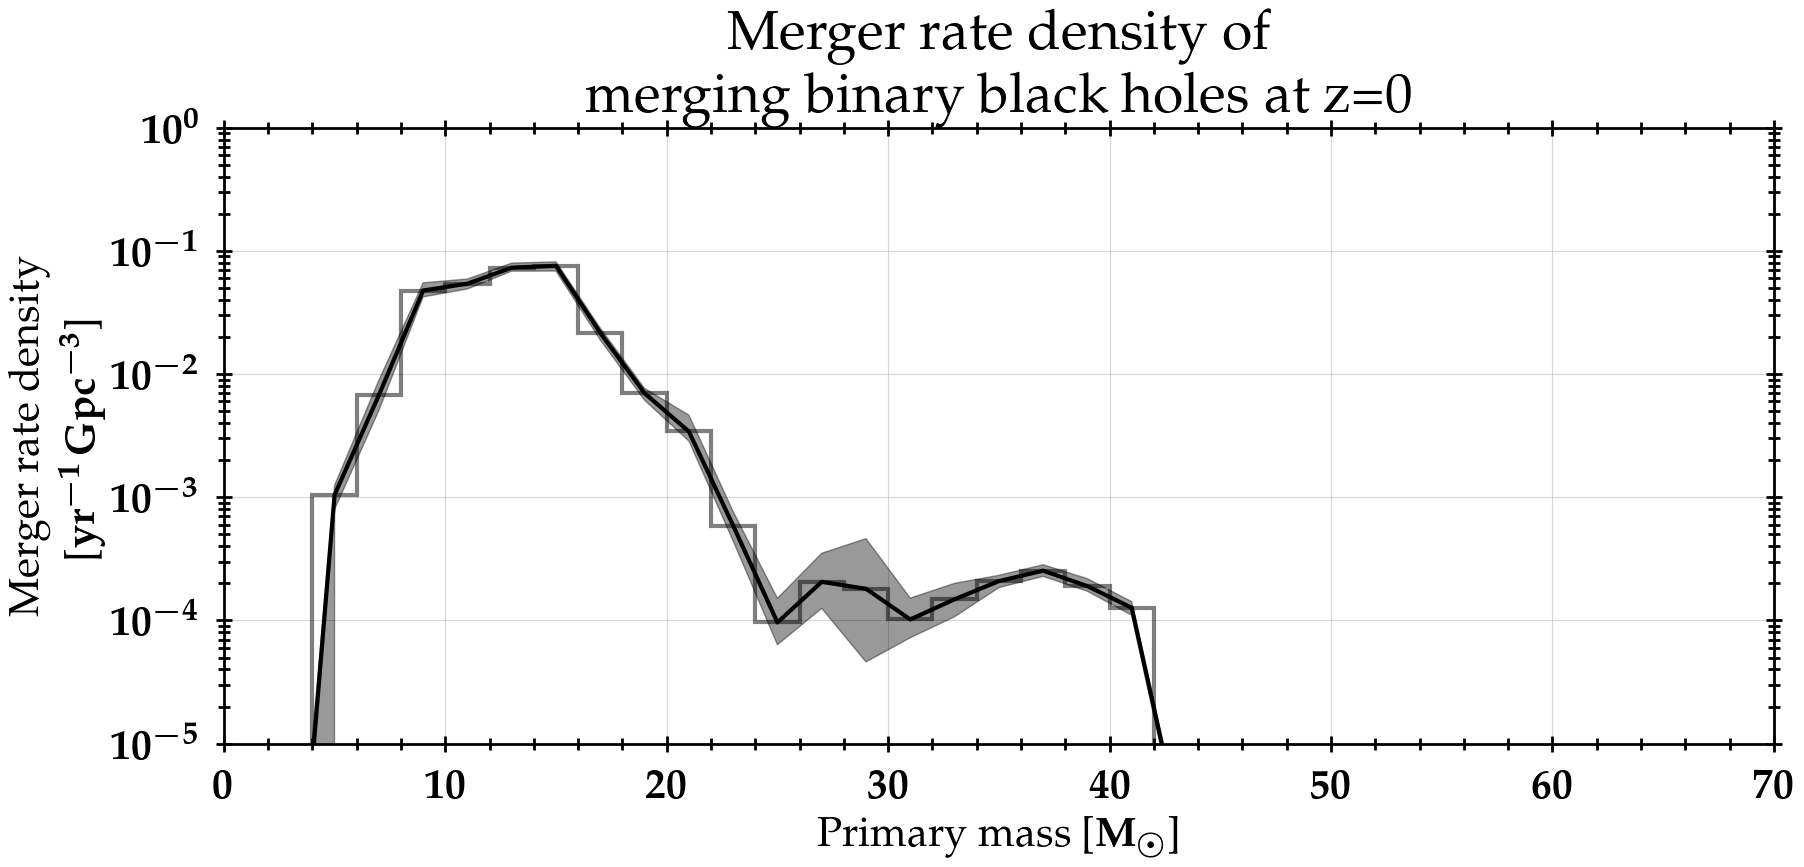

In [120]:
from syntheticstellarpopconvolve.usecase_notebook_utils.usecase_gw_utils import add_confidence_interval_powerlaw_peak_primary_mass, run_bootstrap, plot_bootstrapped_data

primary_mass_bins = np.arange(0, 80, 2)
primary_mass_bin_centers = (primary_mass_bins[1:]+primary_mass_bins[:-1])/2

##################
# Plot data
fig, ax = plt.subplots(figsize=(20,8))

# Plot histogram of primary masses and their associated rates
# ax.hist(primary_mass_array, bins=primary_mass_bins, weights=yield_data, edgecolor='black', alpha=0.7)

# perform bootstrapping of the convolution results
median_percentile_data = run_bootstrap(
    bins=primary_mass_bins,
    bin_centers=primary_mass_bin_centers,
    rates=yield_data,
    masses=primary_mass.value,
    bootstraps=50,
    verbose=False)

# plot the data
plot_bootstrapped_data(
    fig=fig,
    ax=ax,
    bin_centers=primary_mass_bin_centers,
    bin_edges=primary_mass_bins,
    median_percentile_data=median_percentile_data,
    label='test',
    color_i="black",
    linestyle_i="solid",
    include_hist_step=True
)

# # Add confidence interval of observations (GWTC-3).
# fig, ax = add_confidence_interval_powerlaw_peak_primary_mass(
#     fig=fig,
#     ax=ax,
#     data_root=os.path.join(os.environ["DATAFILES_ROOT"], "GW"),
#     fill_between_kwargs={},
#     add_text=True,
#     redshift=0.2,
# )

# Set axis labels and title
ax.set_xlabel('Primary mass [{}]'.format(u.Msun.to_string("latex_inline")))
ax.set_ylabel('Merger rate density\n[{}]'.format(unit_dict['yield'].to_string("latex_inline")))
ax.set_title('Merger rate density of\nmerging binary black holes at z=0')
ax.set_ylim(0.00001, 1)
ax.set_xlim(0, 70)
ax.set_yscale('log')

plt.show()



In [ ]:
# TMP_DIR = temp_dir(
#     "examples", "minimal_working_example", clean_path=True
# )

# res_lb=0.1
# lb_bins_temp = np.arange(0,10+res_lb, step=res_lb)
# lb_bins = np.round(lb_bins_temp, 2).tolist()
# print(lb_bins)

TMP_DIR = '/Users/floorbroekgaarden/Projects/GitHub/syntheticstellarpopconvolve/temp_dir_try'

# Create instance of output
output_hdf5_filename = os.path.join(TMP_DIR, "output_example.h5")




generate_boilerplate_outputfile(output_hdf5_filename)

# SET UP DATA
example_data = {
    "delay_time": delay_times,
    "ones": np.ones_like(delay_times),
    "metallicity": metallicity_BBHs
    "number_per_solar_mass_values": formation_efficiencies,
}
example_df = pd.DataFrame.from_records(example_data)
example_df.to_hdf(output_hdf5_filename, key="input_data/example")

# Set up global configuration
convolution_config = copy.copy(default_convolution_config)
convolution_config["output_filename"] = output_hdf5_filename

# Set up SFR
convolution_config["SFR_info"] = {
    "lookback_time_bin_edges": np.asarray(lb_bins) * u.Gyr,
    "starformation_rate_array": np.asarray(lb_bins)[1:] * u.Msun / u.Gyr
}

# set up convolution bin edges
convolution_config["convolution_lookback_time_bin_edges"] = (
    np.asarray(lb_bins) * u.Gyr
)

# print(lb_bins* u.Gyr)

# Set up the convolution instructions
convolution_config["convolution_instructions"] = [
    {
        **default_convolution_instruction,
        "input_data_name": "input",
        "output_data_name": "output",
        "data_column_dict": {
            "delay_time": "delay_time",
            "normalized_yield": {"column_name": "probability", "unit": 1/u.Msun},
        },
    }
]

# run convolution
convolve(convolution_config)

# # read out results
# with h5py.File(
#     convolution_config["output_filename"], "r"
# ) as output_hdf5file:
#     groupname = "output_data/example/example/convolution_results/0.5 Gyr/"

#     yield_data = output_hdf5file[groupname + "/yield"][()]
#     unit_dict = extract_unit_dict(output_hdf5file, groupname)

#     print(yield_data) # values
#     print(unit_dict) # units

In [128]:
"""
Routine to download the file from the LIGO dataset to plot the primary mass distribution data
https://zenodo.org/records/5655785
https://github.com/dvolgyes/zenodo_get

STEPS:
- download whole tar file

- remove rest of the tar file
"""

import os
import subprocess
import tarfile
import shutil
import sys

def extract_from_tar(tar_filename, source_filename, target_dir):
    """
    Function to extract specific file from tar file
    """

    with tarfile.open(tar_filename, "r") as tar:
        try:

            # for member in tar.getmembers():
            #     if member.isreg() and os.path.basename(member.name) == source_filename:  # skip if the TarInfo is not files
            #         member.name = os.path.basename(member.name) # remove the path by reset it
            #         print(member.name)
            #         tar.extract(member, output_dir) # extract 

            tar.extract(source_filename, target_filename)
        except KeyError:
            print(f"Warning: File '{source_filename}' not found in the tar archive.")


#
GW_DATA_ROOT = os.path.join("/Volumes/GROWL/GWdata", 'GWTC3')
os.makedirs(GW_DATA_ROOT, exist_ok=True)

#
download_tar = False
extract_file = True
cleanup_after = True

#
tar_filename = "/Volumes/GROWL/GWdata/GWTC3/GWdataGWTC3populations.tar.gz"
source_filename = "o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_mass_data.h5"
target_filename = os.path.join(GW_DATA_ROOT, source_filename)

#
if os.path.isfile(target_filename):
    print("Target file {} already exists!".format(target_filename))
    exit()

######################
# Handle downloading tar if it doesnt exist
if download_tar:
    print("Downloading GW data tar. This likely will take long so please be patient")

    #
    download_command = "zenodo_get --record=11254021 --output-dir={GW_DATA_ROOT}".format(
        GW_DATA_ROOT=GW_DATA_ROOT
    ).split()

    #
    p = subprocess.run(download_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    stdout = p.stdout  # stdout = normal output
    stderr = p.stderr  # stderr = error output

    if p.returncode != 0:
        print("Something went wrong when executing the makefile:")
        print(stderr.decode("utf-8"))
        print("Aborting")
        sys.exit(-1)

    else:
        print(stdout.decode("utf-8"))


######################
# Handle extracting the file from the tar
if extract_file:
    #
    print("Extracting {} from tar file {}".format(source_filename, tar_filename))
    extract_from_tar(
        tar_filename,
        source_filename="GWTC-3-population-data/analyses/PowerLawPeak/"
        + source_filename,
        target_dir=GW_DATA_ROOT,
    )
    print(
        "Extracted {} from tar file {} to {}".format(
            source_filename, tar_filename, target_filename
        )
    )

    # rename dir
    os.rename(os.path.join(GW_DATA_ROOT, source_filename), os.path.join(GW_DATA_ROOT, source_filename+"_tmp"))

    #
    os.rename(os.path.join(GW_DATA_ROOT, source_filename+"_tmp", "GWTC-3-population-data/analyses/PowerLawPeak", source_filename), os.path.join(GW_DATA_ROOT, source_filename))

    # 
    shutil.rmtree(os.path.join(GW_DATA_ROOT, source_filename+"_tmp"))

    # # delete directory with same name
    # for filename in os.listdir(GW_DATA_ROOT):
    #     if (filename == source_filename+"_tmp") and os.path.isdir(os.path.join(GW_DATA_ROOT, source_filename+"_tmp")):
    #         shutil.rmtree(os.path.join(GW_DATA_ROOT, source_filename+"_tmp"))

######################
# Handle deleting the tar
if cleanup_after:
    for filename in os.listdir(GW_DATA_ROOT):
        if not filename == source_filename:
            full_filename = os.path.join(GW_DATA_ROOT, filename)
            print("Removing {}".format(full_filename))
            os.remove(full_filename)


FileNotFoundError: [Errno 2] No such file or directory: 'zenodo_get'

In [123]:
GW_DATA_ROOT = os.path.join("/Volumes/GROWL/GWdata", 'GWTC3')

In [127]:
pip install zenodo_get

Note: you may need to restart the kernel to use updated packages.
